<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, auc
from matplotlib import pyplot as plt
import plotly.graph_objects as go

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
sys.path.append('drive/MyDrive/ML_course')

In [3]:
!ls 'drive/MyDrive/ML_course'

application_data.csv.zip	 medical-charges.csv	       submission_log_reg.csv
application_data_processed.zip	 model_pipeline.joblib	       test.csv
cars.csv			 previous_application.csv.zip  train.csv
columns_description.csv		 process_bank_churn.py	       train_inputs
columns_description.gsheet	 __pycache__		       train_targets
customer_churn_pred.joblib	 regression_data.csv	       val_inputs
customer_segmentation_train.csv  sample_submission.csv	       val_targets


In [7]:
from process_bank_churn import *

In [8]:
import importlib
importlib.reload(process_bank_churn)

NameError: name 'process_bank_churn' is not defined

In [9]:
raw_df=pd.read_csv('drive/MyDrive/ML_course/train.csv')

In [10]:
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [11]:
raw_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
with open ('drive/MyDrive/ML_course/process_bank_churn.py', 'r') as f:
  print(f.read())

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np



def clean_data(raw_df):
    raw_df.drop(['Surname', 'CustomerId'], axis=1, inplace=True)
    X=raw_df.iloc[:,:-1]
    y=raw_df.Exited
    input_cols=raw_df.iloc[:, :-1].columns
    target_col=raw_df.iloc[:,-1].name
    numeric_cols=X.select_dtypes(exclude='object').columns.tolist()
    categorical_cols=X.select_dtypes(include='object').columns.tolist()
    return X, y, input_cols, target_col, numeric_cols, categorical_cols

def split_data(X, y):
    X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    train_inputs=X_train
    val_inputs=X_val
    train_targets=y_train
    val_targets=y_val
    return train_inputs, val_inputs, train_targets, val_targets
    
    

# Кодування категоріальних колонок
def encode_cat(train_inputs, val_inputs, categorical_cols):
    encoder=OneHotEncoder()
    encoder.fit(tr

In [13]:
result=preprocess_data(raw_df)

In [14]:
X_train=result['X_train']
train_targets=result['train_targets']
X_val=result['X_val']
val_targets=result['val_targets']
input_cols=result['input_cols']
scaler=result['scaler']
encoder=result['encoder']
categorical_cols=result['categorical_cols']
numeric_cols=result['numeric_cols']
categories=result['categories']

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [15]:
tree=DecisionTreeClassifier(random_state=42, max_depth=5)

In [16]:
tree.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [17]:
pred_train=tree.predict(X_train)
pred_val=tree.predict(X_val)

area under curve train = 92.5482634837853%


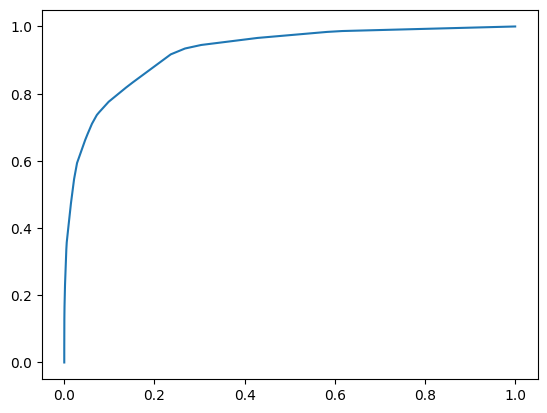

In [18]:
pred_train_proba=tree.predict_proba(X_train)[:,1]
pred_val_proba=tree.predict_proba(X_val)[:,1]
fpr, tpr, threshold = roc_curve(train_targets, pred_train_proba)
roc_auc=auc(fpr, tpr)*100
plt.plot(fpr, tpr)
print(f'area under curve train = {roc_auc}%')

area under curve val = 91.99124559416714%


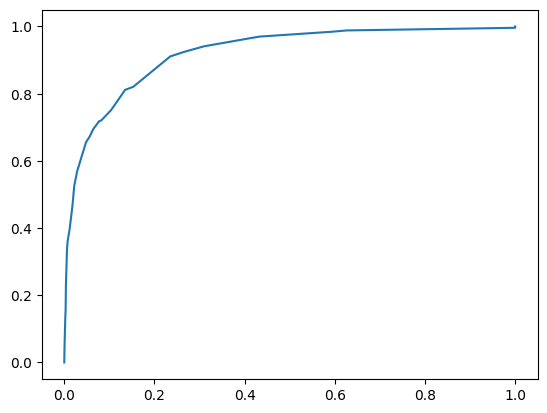

In [19]:
fpr, tpr, threshold = roc_curve(val_targets, pred_val_proba)
roc_auc=auc(fpr, tpr)*100
plt.plot(fpr, tpr)
print(f'area under curve val = {roc_auc}%')

In [20]:
feature_df=pd.DataFrame(zip(tree.feature_names_in_, tree.feature_importances_), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

In [21]:
feature_df

,feature,importance
2,Age,0.569464
5,NumOfProducts,0.321190
7,IsActiveMember,0.052330
4,Balance,0.025039
10,Germany,0.022859
12,Female,0.004803
13,Male,0.004044
8,EstimatedSalary,0.000271
0,id,0.000000
1,CreditScore,0.000000


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [ ]:
?plt.plot

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [22]:
def max_depth():
  train_preds=[]
  val_preds=[]
  for i in range(1,21):
    tree=DecisionTreeClassifier(random_state=42, max_depth=i)
    tree.fit(X_train, train_targets)
    pred_train=tree.predict(X_train)
    pred_val=tree.predict(X_val)
    pred_train_proba=tree.predict_proba(X_train)[:,1]
    pred_val_proba=tree.predict_proba(X_val)[:,1]
    fpr_tr, tpr_tr, threshold_tr = roc_curve(train_targets, pred_train_proba)
    roc_auc_tr=auc(fpr_tr, tpr_tr)*100
    fpr_val, tpr_val, threshold_val = roc_curve(val_targets, pred_val_proba)
    roc_auc_val=auc(fpr_val, tpr_val)*100
    train_preds.append( roc_auc_tr)
    val_preds.append( roc_auc_val)
  plt.plot(train_preds, label='train')
  plt.plot(val_preds, label='validation')
  plt.xlabel('iteration')
  plt.ylabel('area under curve')
  plt.xticks(range(1,21))

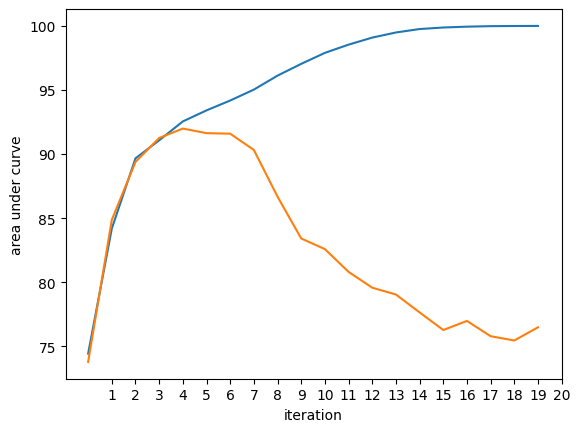

In [23]:
max_depth()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [27]:
test=pd.read_csv('drive/MyDrive/ML_course/test.csv')

In [28]:
test_inputs=preprocess_new_data(test, encoder, scaler, categorical_cols, numeric_cols, categories)